Entrega 001

Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.
        

A base de dados para este desafio pode ser algo como no exemplo a seguir:


```
# Isto está formatado como código
idade,gênero,imc,filhos,fumante,região,encargos
56,feminino,29.774373714007336,2,sim,sudoeste,31109.889763423336
46,masculino,25.857394655216346,1,não,nordeste,26650.702646642694
32,masculino,23.014839993647488,0,não,sudoeste,21459.03799039332
```

Você precisa apenas alimentar ela com mais informações ou utilizar uma outra de sua preferência.
    
        

Exploração de dados:
- Carregue a base de dados e explore suas características.  
- Analise estatísticas descritivas e visualize distribuições relevantes.

Pré-processamento de dados:
- Realize a limpeza dos dados, tratando valores ausentes (se necessário).  
- Converta variáveis categóricas em formatos adequados para modelagem.  

Modelagem:
- Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo, Regressão Linear, Árvores de Decisão, etc).  
- Divida o conjunto de dados em conjuntos de treinamento e teste.  

Treinamento e avaliação do modelo:
- Treine o modelo com o conjunto de treinamento.  

Validação estatística:
- Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).  

O que avaliaremos:
- Apresente resultados visuais, como gráficos de previsões vs. valores reais.  
- Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.  

Observações:
Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas.



# Nova seção

---


eda.py


Visão Geral Estatística dos Dados Após Codificação:
            idade         imc      filhos      encargos
count  203.000000  203.000000  203.000000    203.000000
mean    41.615764   28.634131    1.891626  26050.641539
std     13.671179    3.943029    1.424009   5725.636786
min     18.000000   19.639929    0.000000  15068.846127
25%     30.000000   26.113907    1.000000  21471.877341
50%     42.000000   28.504379    2.000000  26142.164418
75%     54.000000   31.523490    3.000000  30023.612864
max     64.000000   37.556144    4.000000  39236.770509


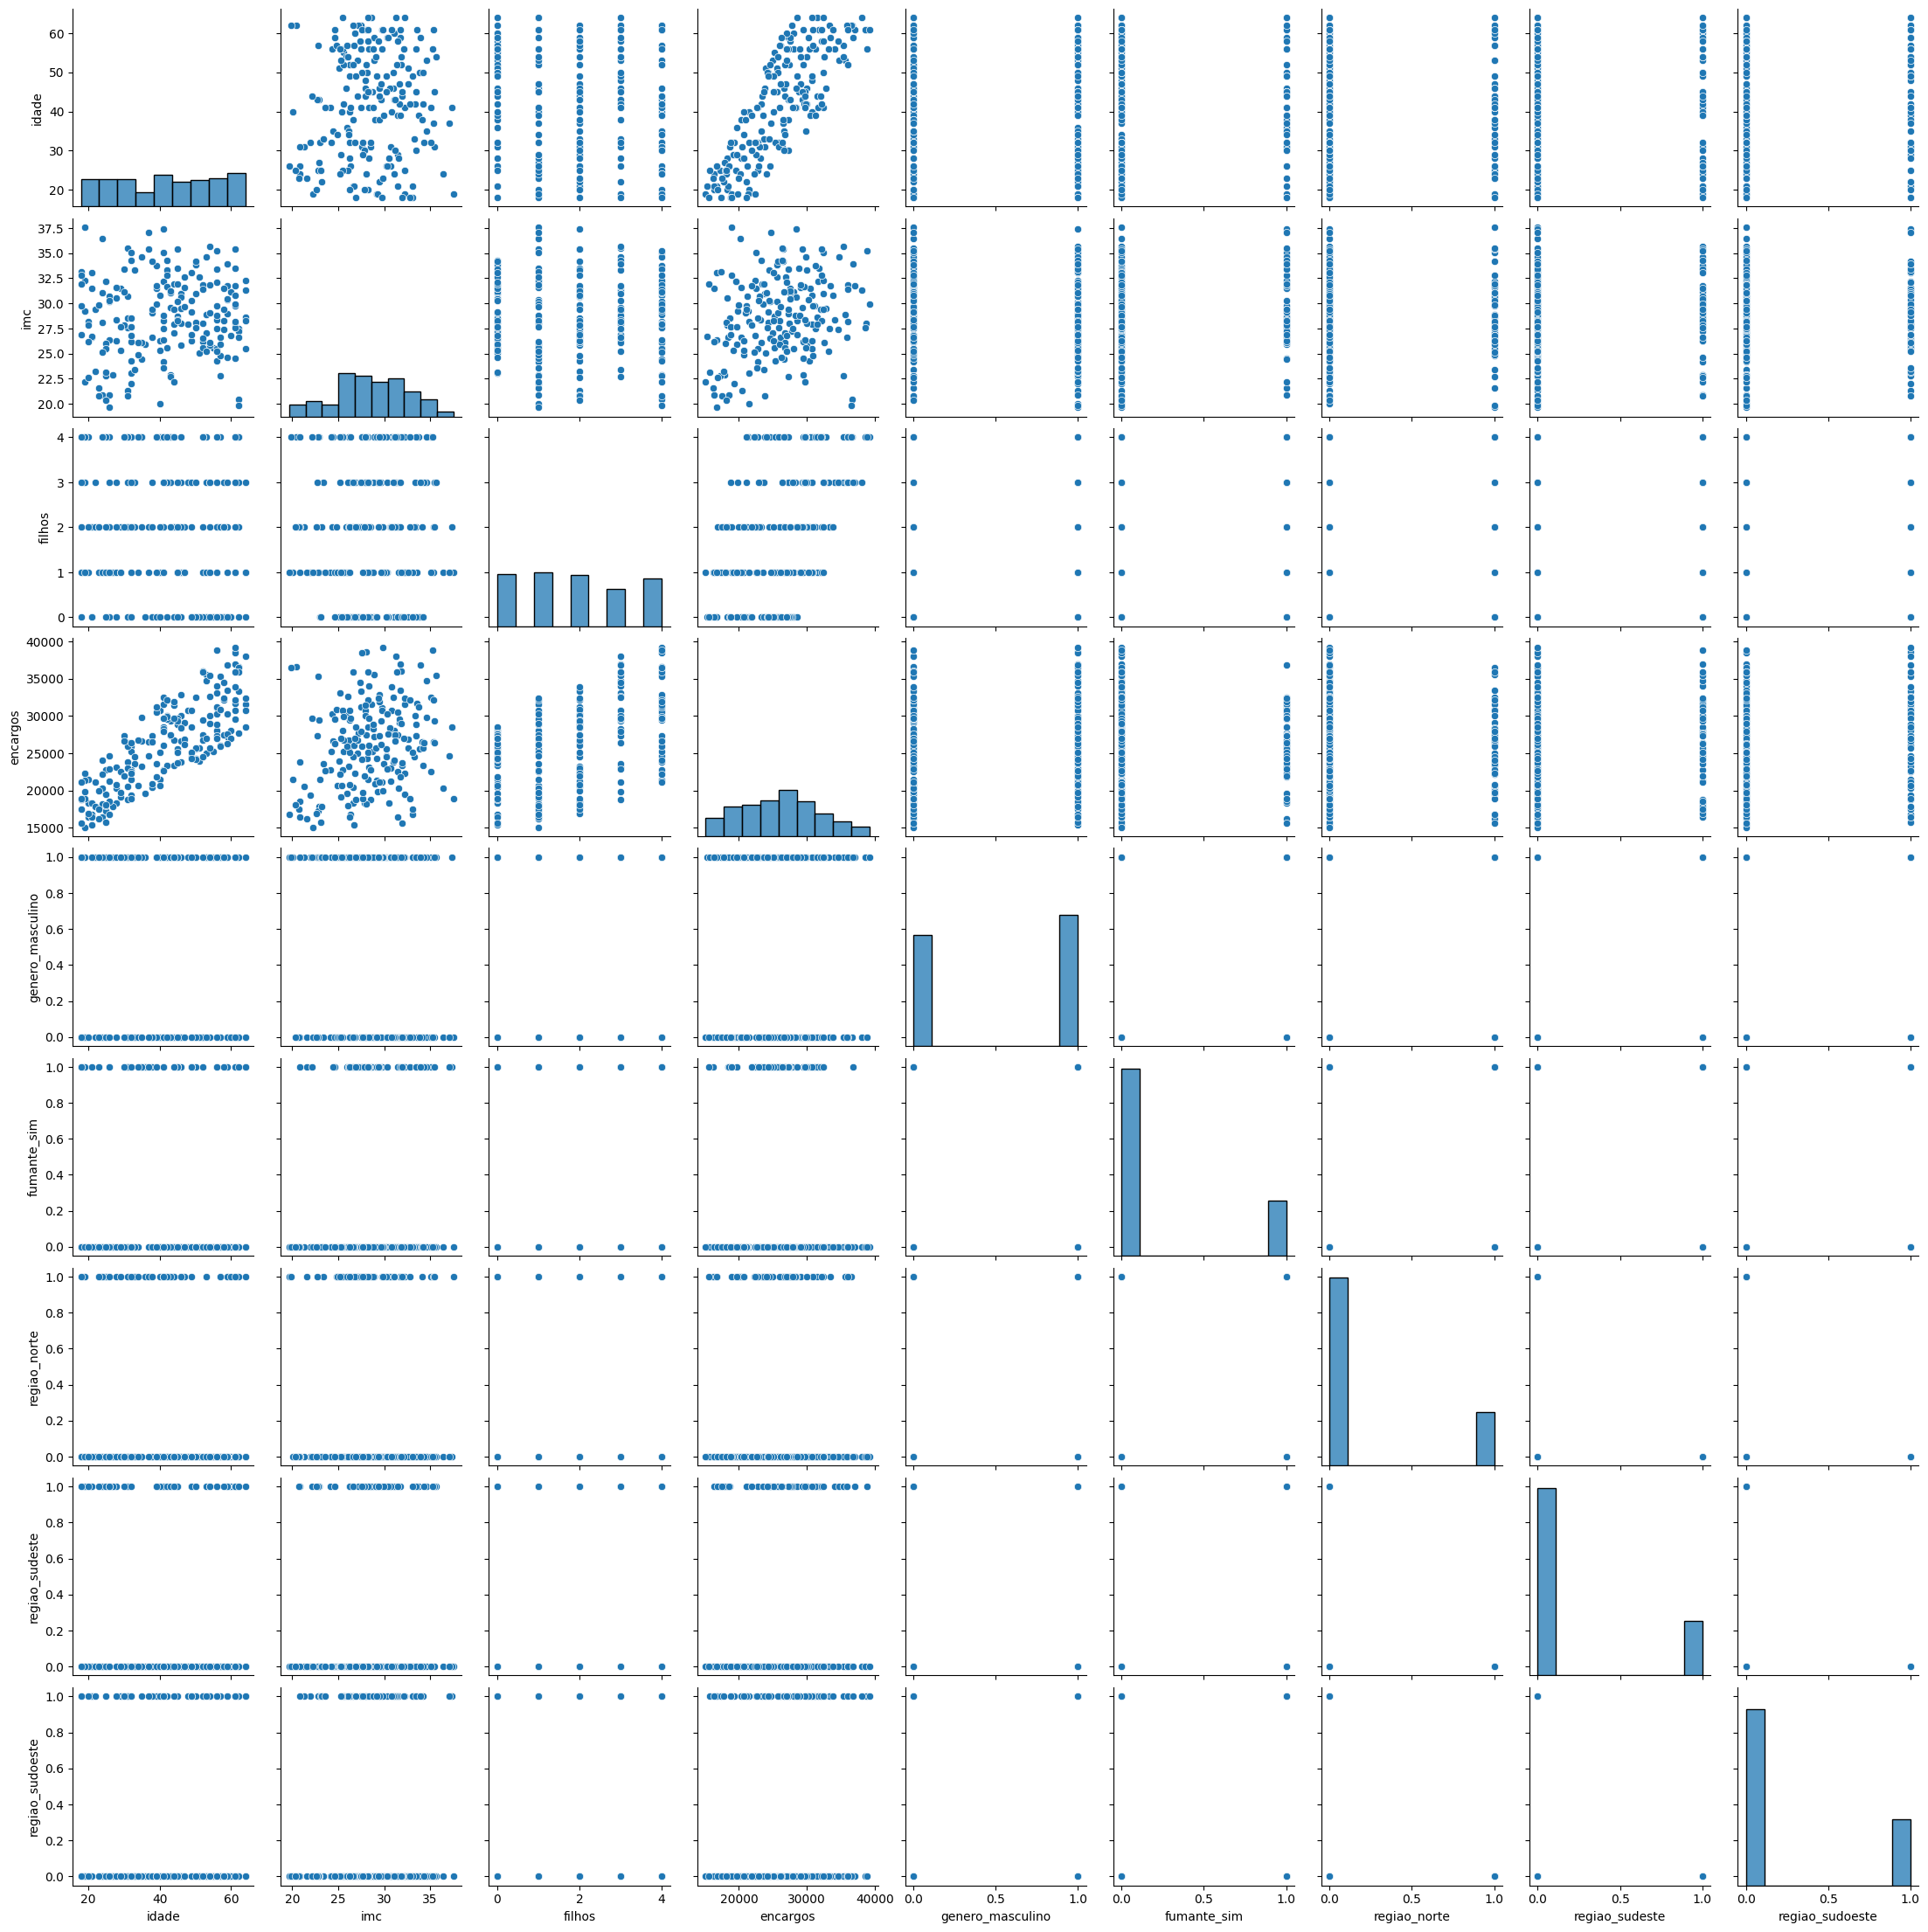


Correlações Após Codificação:


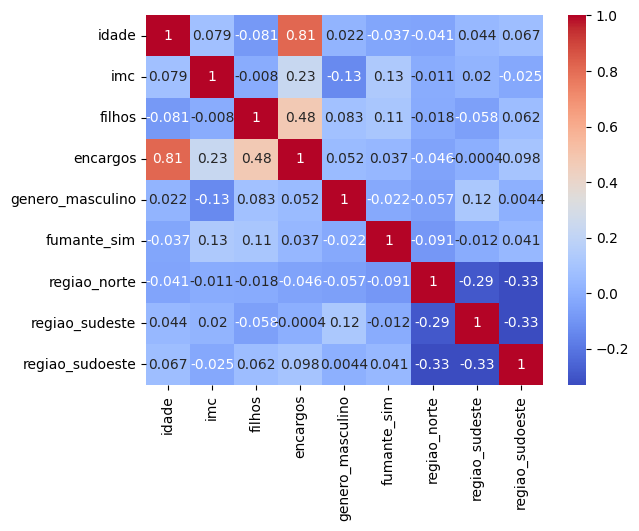

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados originais
dados_originais = {
    'idade': [56, 46, 32],
    'genero': ['feminino', 'masculino', 'masculino'],
    'imc': [29.774, 25.857, 23.015],
    'filhos': [2, 1, 0],
    'fumante': ['sim', 'não', 'não'],
    'regiao': ['sudoeste', 'nordeste', 'sudoeste'],
    'encargos': [31109.89, 26650.70, 21459.04]
}

# Variável para controlar a quantidade de dados gerados
quantidade_dados = 200

# Gerando dados adicionais com controle de quantidade
np.random.seed(42)  # Para reprodutibilidade

idades_novas = np.random.randint(18, 65, size=quantidade_dados)
generos_novos = np.random.choice(['feminino', 'masculino'], size=quantidade_dados)
imcs_novos = np.random.normal(28, 4, size=quantidade_dados)  # Gerando IMCs com distribuição normal
filhos_novos = np.random.randint(0, 5, size=quantidade_dados)
fumantes_novos = np.random.choice(['sim', 'não'], size=quantidade_dados, p=[0.2, 0.8])  # Probabilidades para fumantes
regioes_novas = np.random.choice(['sudoeste', 'nordeste', 'sudeste', 'norte'], size=quantidade_dados)

# Base de cálculo para encargos ajustada para incluir efeitos de ser fumante e número de filhos
encargos_novos = 2000 + (idades_novas * 200) + (imcs_novos * 150)  # Base de cálculo para encargos
encargos_novos *= (1 + (filhos_novos * 0.1)) * (1.5 if 'sim' in fumantes_novos else 1)

# Unindo os dados originais com os novos dados gerados
dados_ampliados = {
    'idade': np.concatenate((dados_originais['idade'], idades_novas)),
    'genero': np.concatenate((dados_originais['genero'], generos_novos)),
    'imc': np.concatenate((dados_originais['imc'], imcs_novos)),
    'filhos': np.concatenate((dados_originais['filhos'], filhos_novos)),
    'fumante': np.concatenate((dados_originais['fumante'], fumantes_novos)),
    'regiao': np.concatenate((dados_originais['regiao'], regioes_novas)),
    'encargos': np.concatenate((dados_originais['encargos'], encargos_novos))
}

df_ampliado = pd.DataFrame(dados_ampliados)

# Convertendo variáveis categóricas em numéricas com one-hot encoding
df_encoded_ampliado = pd.get_dummies(df_ampliado, drop_first=True)

# Explorando estatísticas descritivas da base de dados ampliada
print("Visão Geral Estatística dos Dados Após Codificação:")
print(df_encoded_ampliado.describe())

# Visualizando relações com gráficos
sns.pairplot(df_encoded_ampliado)
plt.show()

# Calculando e visualizando correlações na base de dados ampliada
print("\nCorrelações Após Codificação:")
correlacoes_ampliadas = df_encoded_ampliado.corr()
sns.heatmap(correlacoes_ampliadas, annot=True, cmap="coolwarm")
plt.show()


*texto em itálico*


---


modelagem.py

Treinando o modelo...

Erro Quadrático Médio (MSE): 631271.9526649514
Coeficiente de Determinação (R^2): 0.9848954026449546 - Quanto mais próximo de 1, melhor.


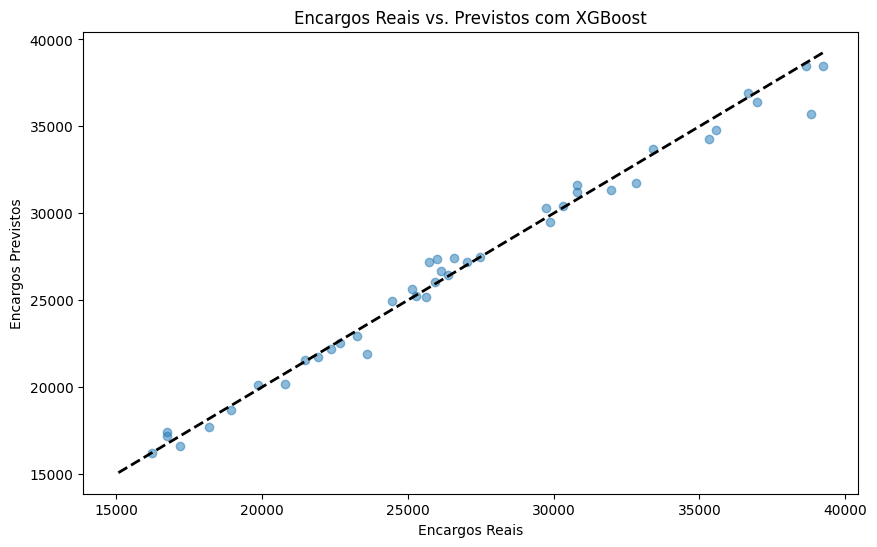

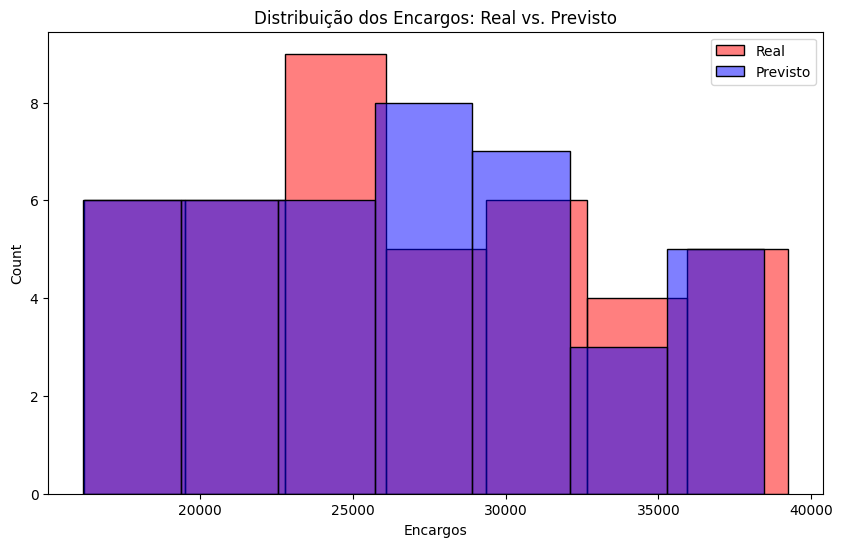


Conclusão: O modelo XGBoost demonstrou ser eficaz para prever os custos médicos com base nas características fornecidas, como mostram os resultados visuais e as métricas de avaliação.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Passo 1: Preparação dos Dados (eda.py)

# Identificando características numéricas e já codificadas (categóricas)
features_numericas = ['idade', 'imc', 'filhos']
features_codificadas = [col for col in df_encoded_ampliado.columns if col not in features_numericas + ['encargos']]

# Preparando o transformador de colunas para escalar as características numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_numericas)
    ], remainder='passthrough')

# Passo 2: Definição do Modelo

modelo_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.05, random_state=42)

# Criando um pipeline para pré-processamento e modelagem
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', modelo_xgb)])

# Passo 3: Divisão dos Dados em Treino e Teste

X = df_encoded_ampliado.drop('encargos', axis=1)
y = df_encoded_ampliado['encargos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 4: Treinamento do Modelo

print("Treinando o modelo...")
pipeline.fit(X_train, y_train)

# Passo 5: Avaliação do Modelo

y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nErro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R^2): {r2} - Quanto mais próximo de 1, melhor.")

# Passo 6: Visualização dos Resultados

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Encargos Reais')
plt.ylabel('Encargos Previstos')
plt.title('Encargos Reais vs. Previstos com XGBoost')
plt.show()

# Comparando as distribuições dos valores reais e previstos
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color="red", alpha=0.5, label='Real')
sns.histplot(y_pred, color="blue", alpha=0.5, label='Previsto')
plt.xlabel('Encargos')
plt.title('Distribuição dos Encargos: Real vs. Previsto')
plt.legend()
plt.show()

print("\nConclusão: O modelo XGBoost demonstrou ser eficaz para prever os custos médicos com base nas características fornecidas, como mostram os resultados visuais e as métricas de avaliação.")
